<h1 style = "color:red; border-bottom: 4px solid gold; 
           align: center;
           padding-bottom: 5px;">KNN Tutorial</h1>

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df["flowers"] = iris.target
df["flowers"] = df.flowers.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flowers
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df0 = df[df.flowers == "setosa"]
df1 = df[df.flowers == "versicolor"]
df2 = df[df.flowers == "virginica"]

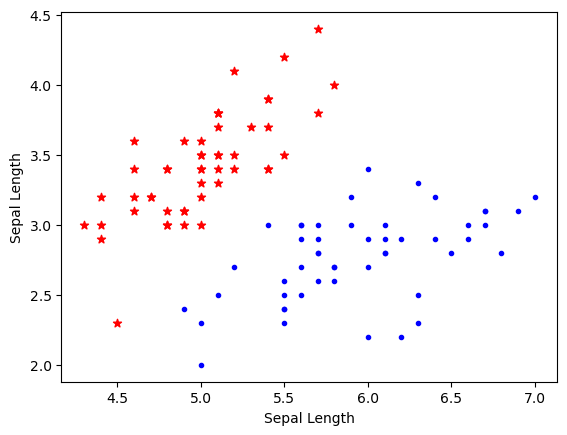

In [18]:
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"],marker = "*",color ="red")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"],marker = ".",color ="blue")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Length")
plt.show()

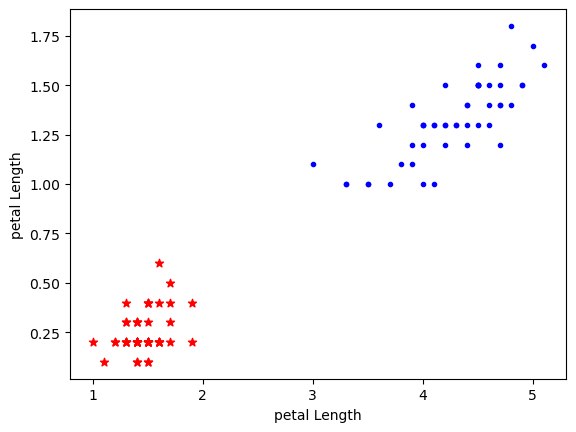

In [19]:
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"],marker = "*",color ="red")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"],marker = ".",color ="blue")
plt.xlabel("petal Length")
plt.ylabel("petal Length")
plt.show()

##### Data Preprocessing

---

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(["flowers"],axis =1), df.flowers, test_size=0.2, random_state=1)

In [22]:
len(X_train)

120

In [23]:
len(X_test)

30

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
knn.score(X_test,y_test)

0.9666666666666667

In [30]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

In [34]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

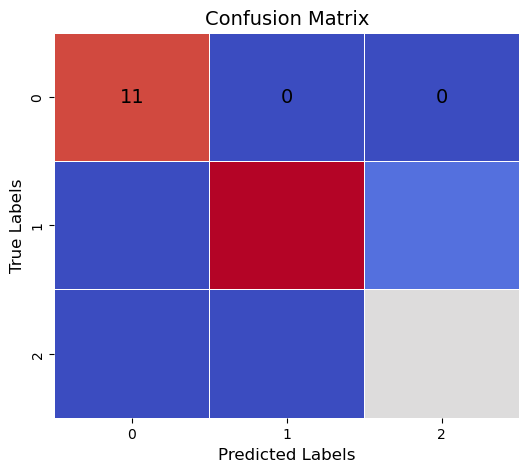

In [36]:
# Assuming cm = your confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, linewidths=0.5,
            annot_kws={"size": 14, "color": "black"})
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

